In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Algorithms
Algorithm: set of steps or instructions to complete a task
* Clearly defined problem statement, input, and output
* The steps need to be in a very specific order.
* The steps need to be distinct
* A result should be produced
* It should complete in a finite amount of time.

## Algorithmic thinking
* Break a complex problem into distinct components and identifying the right tools to solve each component
### What makes up a good algorithm?
* Correctness: Defining the problem, clear input, clear output.
* Efficiency: Time and space complexity
    * Best & worst case scenario
* Complexity: O(1) constant, O(n) linear search, O(log n) binary search, O(n^2) quadratic, O(n log n) Quasilinear.
    * Polynomial runtime: O(n^k)
    * Exponential runtime: O(X^n)
    * Factorial/combinatorial runtime O(n!)

## Linear search O(n)
Worst-case: linear

In [2]:
# Linear search
def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

# Example usage:
arr = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
target = 11
result = linear_search(arr, target)
if result != -1:
    print(f"Element {target} is present at index {result}.")
else:
    print(f"Element {target} is not present in the array.")


Element 11 is present at index 5.


## Binary search O(log n)
Best-case: Constant

Worst-case: Logarithmic

In [3]:
# Binary Search on a sorted array
def binary_search(arr, target):
    left, right = 0, len(arr) - 1

    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return -1

# Example usage:
arr = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
target = 11
result = binary_search(arr, target)
if result != -1:
    print(f"Element {target} is present at index {result}.")
else:
    print(f"Element {target} is not present in the array.")

Element 11 is present at index 5.


## Recursive binary search O(log n)
* Tail recursion: the recursion happens at the end of the function

In [4]:
def recursive_binary_search(mylist, target):
    # Empty list stopping condition
    if len(mylist) == 0:
        return False
    else:
        midpoint = (len(mylist))//2
        
        # Midpoint is target stopping condition
        if mylist[midpoint] == target:
            return [True, midpoint]
        else:
            if mylist[midpoint] < target:
                recursive_binary_search(mylist[midpoint+1:], target)
            else:
                recursive_binary_search(mylist[:midpoint], target)
# Example usage:
arr = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
target = 11
result = recursive_binary_search(arr, target)
if result != -1:
    print(f"Element {target} is present at index {result}.")
else:
    print(f"Element {target} is not present in the array.")

Element 11 is present at index [True, 5].


### Recursion and space complexity

Recursive function: one that calls itself.
* Stopping condition (base case)
* Recursive depth: # of times a function calls itself

Functional languages (not Python) often prefer recursion over modifying variable values because recursion fits naturally with the functional programming paradigm, which emphasizes immutability, referential transparency, and the use of pure functions.

Space complexity: measure of how much working storage is needed as a particular algorithm grows

# Data structures
[Notion - The roadmap: Data Structures Illustrated](https://www.notion.so/The-roadmap-Data-Structures-Illustrated-7172307b8ae54cd1a4cda737fb110009?pvs=4)

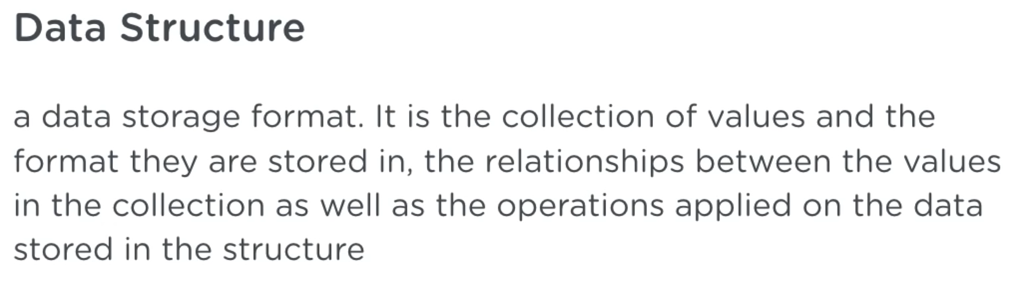

We need to be able to perform CRUD operations on the data structure.

In [5]:
# Arrays (Python list)
new_list = [1,2,3]

result = new_list[0]

# Linear search - constant time
if 1 in new_list: print(True)
    
for n in new_list:
    if n ==3:
        print(True)
        break
        
# Insert
new_list.append(4) # Linear time
new_list.extend([5,6])
print(new_list)

# Delete: linear runtime
new_list.remove(4)
print(new_list)

True
True
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 5, 6]


## Linked list
* Inserting data is more efficient than arrays (only for inserting at the head or tail, prepend or append)

In [6]:
# Linked list
class Node:
    """
    An object for storing a single node of a linked list
    Models two attributes - data and the link to the next node in the list
    """
    data = None
    next_node = None
    
    def __init__(self, data):
        self.data = data
        
    # Runs when the object is inspected
    def __repr__(self):
        return f"<Node data: {self.data}>"
        
N1 = Node(10)
print(N1)
N2 = Node(20)
N1.next_node = N2
# N1 points to N2
print(N1.next_node)

class LinkedList:
    """
    Singly linked list
    """
    def __init__(self):
        self.head = None
        
    def is_empty(self):
        return self.head == None
    
    def size(self):
        """
        Returns the number of nodes in the list
        Takes O(n) time
        """
        current = self.head
        count = 0
        
        while current:
            count += 1
            current = current.next_node
        return count
    
    def add(self, data):
        """
        Adds new Node containing data at the head of the list
        Takes O(1) time
        """
        new_node = Node(data)
        new_node.next_node = self.head
        self.head = new_node
    
    def search(self, key):
        """
        Search for the first node containing data that matches the key
        Return the node or None if not found
        Takes O(n) time
        """
        current = self.head
        while current:
            if current.data == key:
                return current
            else:
                current = current.next_node
        return None
    
    def insert(self, data, index):
        """
        Insert a node at a specific position of the list
        Takes O(1) time but finding the node at the insertion point takes O(n) time
        Takes overall linear time O(n)
        """
        if index == 0:
            self.add(data)
        if index > 0:
            new = Node(data)
            position = index
            current = self.head
            
            while position > 1:
                # traverse the list until you reach the desired position
                current = current.next_node
                position -= 1
                
            # Make insertion
            prev_node = current
            next_node = current.next_node
            
            prev_node.next_node = new
            new.next_node = next_node
            
    def remove(self, key):
        """
        Removes Node containing data that matches the key
        Returns the node or None if key doesn't exist
        Takes O(n) time (linear)
        """
        current = self.head
        previous = None
        found = False
        
        while current and not found:
            if current.data == key and current == self.head:
                found = True
                self.head = current.next_node
            elif current.data == key:
                found = True
                previous.next_node = current.next_node
            else:
                previous = current
                current = current.next_node
        return current
    
    def __repr__(self):
        """
        Return a string representation of the list
        Takes O(n) time
        """
        nodes = []
        current = self.head
        
        while current:
            if current is self.head:
                nodes.append(f"[Head: {current.data}]")
            elif current.next_node is None:
                nodes.append(f"[Tail: {current.data}]")
            else:
                nodes.append(f"[{current.data}]")
                
            current = current.next_node
        return '-> '.join(nodes)
    
# Create the linked list
l = LinkedList()
# Add the head
l.head = N1
print(l.size()) # Since N1 points to N2 the list has a size of 2
# Add new nodes
l.add(30)
l.add(40)
print(l.head, f'size: {l.size()}')

# Print the contents of the list
print(l)

# Search for 30
print(l.search(30))

l.insert(80, 2)

print('Insert new node:\n', l)

<Node data: 10>
<Node data: 20>
2
<Node data: 40> size: 4
[Head: 40]-> [30]-> [10]-> [Tail: 20]
<Node data: 30>
Insert new node:
 [Head: 40]-> [30]-> [80]-> [10]-> [Tail: 20]
